<a href="https://colab.research.google.com/github/Mandal-Anik10/random-stuff/blob/main/Vela_Pulser_Data_Analysis/Vela_Pulser_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting a pulsar in Ooty Radio Telescope voltage data
___________________________________
Anik Mandal

Joint SPPU-IUCAA M.Sc Student-2021

PRN : 22021004567
___________________________________

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Extracting data from the txt file

Volt_N = []
Volt_S = []

with open("ch00_B0833-45_20150612_191438_011_1.txt", "r") as f:
    lines = f.readlines()
    for l in lines:    # Amount of data you want to work with
        Volt_N.append(float(l.split()[0]))
        Volt_S.append(float(l.split()[1]))

# Another way of extracting data form txt file
#Volt_N, Volt_S = np.loadtxt("ch00_B0833-45_20150612_191438_011_1.txt", delimiter = ' ', unpack = True)

In [ ]:
N = len(Volt_N)    # Number of smaple points
dt = 1/(2 * 16.5*10**6)    # Sampling rate/ sampling time resolution

T = N*dt    # Duration of the received data

Time_Series = np.linspace(0, T, N)

## Task : 1

Text(0, 0.5, 'Voltage(South)')

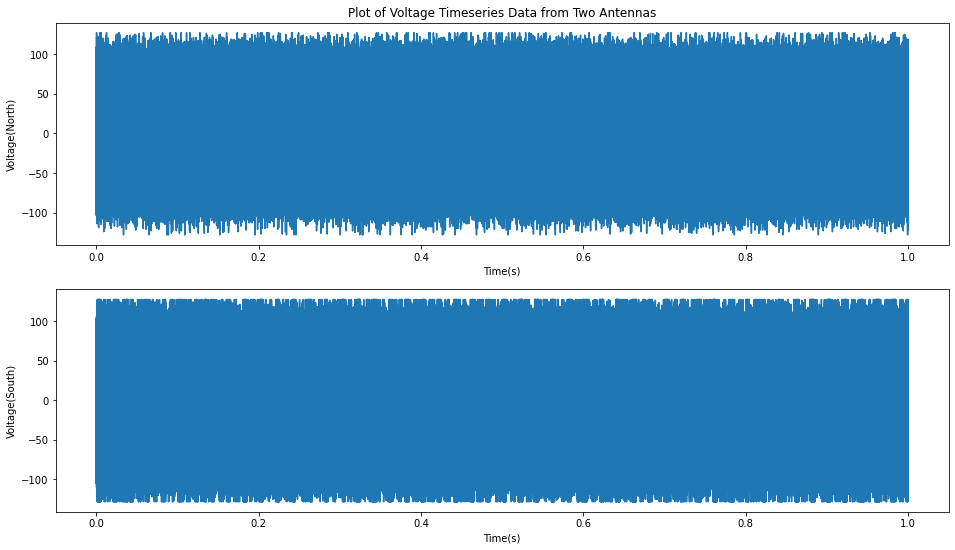

In [ ]:
fig = plt.figure(figsize = (16, 9))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(Time_Series, Volt_N)
ax1.set_xlabel('Time(s)')
ax1.set_ylabel('Voltage(North)')
ax1.set_title("Plot of Voltage Timeseries Data from Two Antennas")

ax2.plot(Time_Series, Volt_S)
ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Voltage(South)')

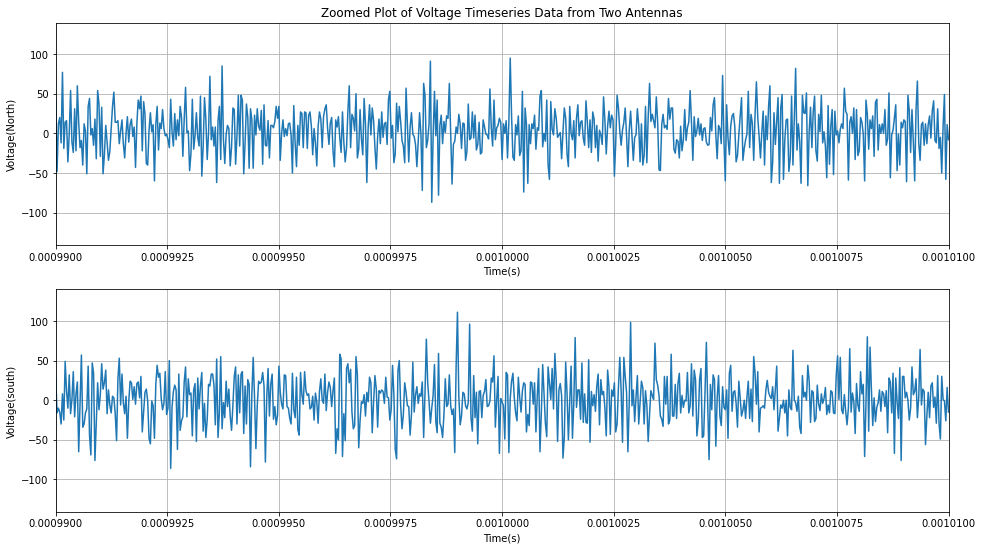

In [ ]:
# Zoomed in version of the data 
fig = plt.figure(figsize = (16, 9))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(Time_Series, Volt_N)
ax1.set_xlabel('Time(s)')
ax1.set_ylabel('Voltage(North)')
ax1.set_xlim([0.00099, 0.00101])
ax1.set_title("Zoomed Plot of Voltage Timeseries Data from Two Antennas")
ax1.grid()

ax2.plot(Time_Series, Volt_S)
ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Voltage(south)')
ax2.set_xlim([0.00099, 0.00101])
ax2.grid()

## Task : 2

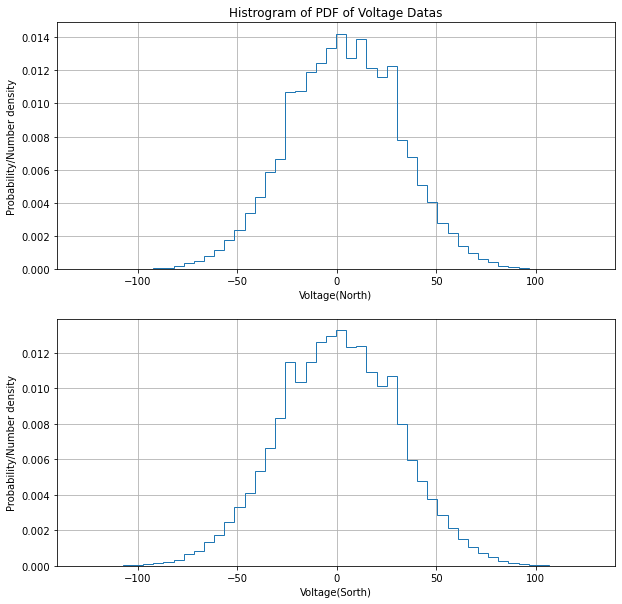

In [ ]:
# Voltage amplitude distribution

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.hist(Volt_N, bins = 50, density = True, histtype = 'step')
ax1.set_xlabel('Voltage(North)')
ax1.set_ylabel('Probability/Number density')
ax1.set_title("Histrogram of PDF of Voltage Datas")
ax1.grid()

ax2.hist(Volt_S, bins = 50, density = True, histtype = 'step')
ax2.set_xlabel('Voltage(Sorth)')
ax2.set_ylabel('Probability/Number density')
ax2.grid()

________________________________________________________________


In [ ]:
# Defining a function which will find mean and standard deviation of a list of data
def Stat(data):
    s = 0
    for i in range(len(data)):
        s = s + data[i]
    mean = s/len(data)
    
    var = 0
    for i in range(len(data)):
        var = var +  (data[i] - mean) * (data[i] - mean)
    sd = (var/len(data))**0.5
    return mean, sd

Formula for Gaussian probability function:
$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp(-\frac{(x-\mu)^2}{2\sigma^2})$

Used Formula for Mean : 
$\bar{x} = \frac{\sum_i{x_i}}{N}$

Used Formula for S.D. : 
$\sigma_x = \sqrt{\frac{\sum_i{({x_i}- \bar{x})^2}}{N}}$
________________________________________________________________


In [ ]:
mean_N, sd_N = Stat(Volt_N)
mean_S, sd_S = Stat(Volt_S)

print("North Antennae data :\n Mean : ", mean_N, "\t SD : ", sd_N)
print("\nSouth Antennae data :\n Mean : ", mean_S, "\t SD : ", sd_S)

North Antennae data :
 Mean :  3.4847314552367616 	 SD :  28.03035095176956

South Antennae data :
 Mean :  0.775094078970335 	 SD :  29.91954346774233


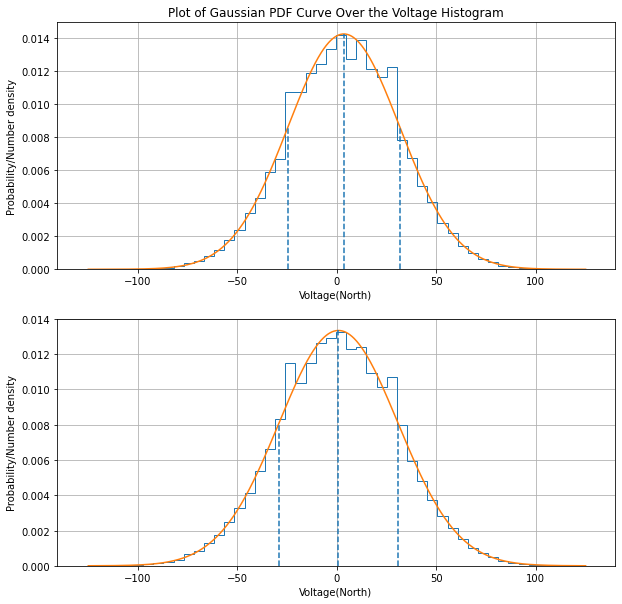

In [ ]:
# plot of Gaussian probability density function curve over the histogram
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

def Gaussian_ProbDist(array, mean, sd):
    dist = []
    for i in range(len(array)):
        d = np.exp(-((array[i]-mean)**2)/(2*sd*sd))/(2*np.pi*sd*sd)**0.5
        dist.append(d)
    return np.array(dist)

voltage = np.linspace(-125, 125, 1000)
Fit_N = Gaussian_ProbDist(voltage, mean_N, sd_N)
Fit_S = Gaussian_ProbDist(voltage, mean_S, sd_S)

ax1.hist(Volt_N, bins = 50, density = True, histtype = 'step')
ax1.plot(voltage, Fit_N)
ax1.vlines([mean_N, mean_N-sd_N, mean_N+sd_N], 
           ymin = 0, 
           ymax = Gaussian_ProbDist([mean_N, mean_N-sd_N, mean_N+sd_N], mean_N, sd_N),
           linestyle = 'dashed',
           label = ['$\mu$', '$-\sigma$', '$\sigma$'])
ax1.set_xlabel('Voltage(North)')
ax1.set_ylabel('Probability/Number density')
ax1.set_title('Plot of Gaussian PDF Curve Over the Voltage Histogram')
ax1.grid()

ax2.hist(Volt_S, bins = 50, density = True, histtype = 'step')
ax2.plot(voltage, Fit_S)
ax2.vlines([mean_S, mean_S-sd_S, mean_S+sd_S],
           ymin = 0,
           ymax = Gaussian_ProbDist([mean_S, mean_S-sd_S, mean_S+sd_S], mean_S, sd_S),
           linestyle = 'dashed',
           label = ['$\mu$', '$-\sigma$', '$\sigma$'])
ax2.set_xlabel('Voltage(North)')
ax2.set_ylabel('Probability/Number density')
ax2.grid()

## Task : 3

In [ ]:
# Evaluating power data from the voltage data
power_N = np.array(Volt_N[0:-2:2]) ** 2 + np.array(Volt_N[1:-1:2]) ** 2
power_S = np.array(Volt_S[0:-2:2]) ** 2 + np.array(Volt_S[1:-1:2]) ** 2

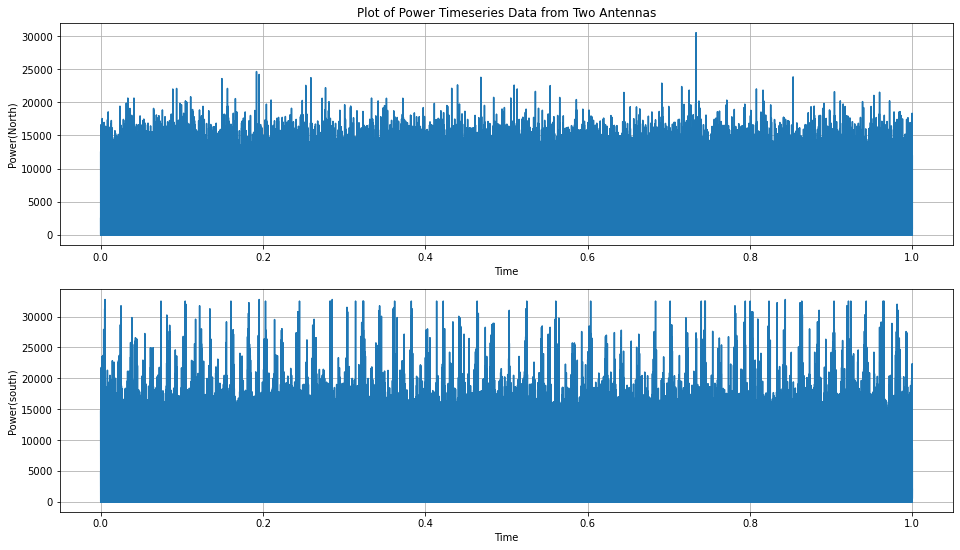

In [ ]:
# Plot of power spectrum 
fig = plt.figure(figsize = (16, 9))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(Time_Series[0:-2:2], power_N)
ax1.set_xlabel('Time')
ax1.set_ylabel('Power(North)')
ax1.set_title("Plot of Power Timeseries Data from Two Antennas")
ax1.grid()

ax2.plot(Time_Series[0:-2:2], power_S)
ax2.set_xlabel('Time')
ax2.set_ylabel('Power(south)')
ax2.grid()

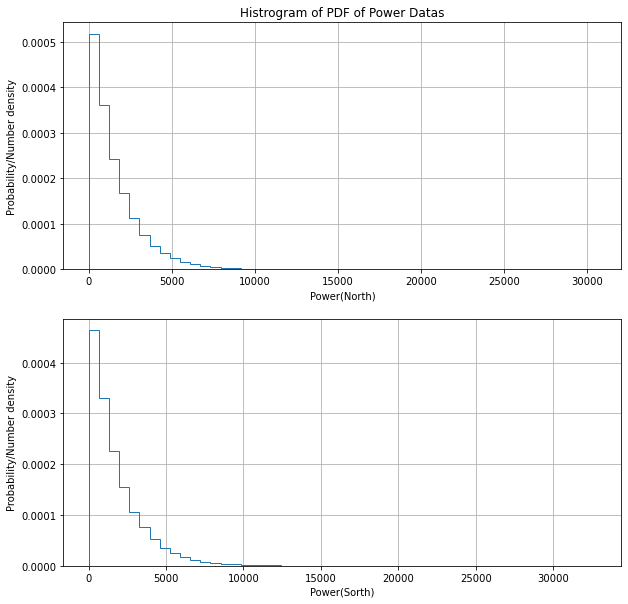

In [ ]:
# PLot of Power distribution function

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.hist(power_N, bins = 50, density = True, histtype = 'step')
ax1.set_xlabel('Power(North)')
ax1.set_ylabel('Probability/Number density')
ax1.set_title("Histrogram of PDF of Power Datas")
ax1.grid()

ax2.hist(power_S, bins = 50, density = True, histtype = 'step')
ax2.set_xlabel('Power(Sorth)')
ax2.set_ylabel('Probability/Number density')
ax2.grid()

In [ ]:
mean_N, sd_N = Stat(power_N)
mean_S, sd_S = Stat(power_S)

print("North Antennae power data:\n Mean : ", mean_N, "\t SD : ", sd_N)
print("\nSouth Antennae power data :\n Mean : ", mean_S, "\t SD : ", sd_S)

North Antennae power data:
 Mean :  1595.6876714965551 	 SD :  1596.7798055673418

South Antennae power data :
 Mean :  1791.5597337861343 	 SD :  1802.062107015144


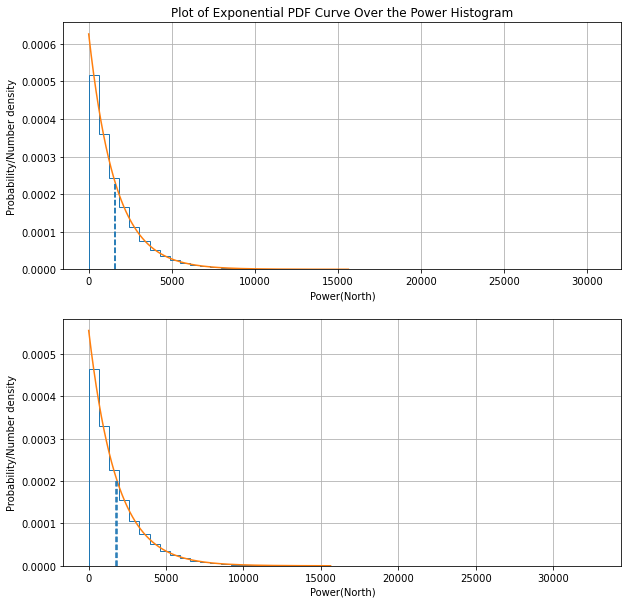

In [ ]:
# plot of probability density function curve over the power histogram
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

def ProbDist(array, mean, sd):
    dist = []
    for i in range(len(array)):
        d = np.exp(-array[i]/sd)/sd  
        dist.append(d)
    return np.array(dist)

power = np.linspace(0, 125**2, 10000)
Fit_N = ProbDist(power, mean_N, sd_N)
Fit_S = ProbDist(power, mean_S, sd_S)

ax1.hist(power_N, bins = 50, density = True, histtype = 'step')
ax1.plot(power, Fit_N)
ax1.vlines([mean_N, sd_N], 
           ymin = 0, 
           ymax = ProbDist([mean_N, sd_N], mean_N, sd_N),
           linestyle = 'dashed',
           label = ['$\mu$', '$\sigma$'])
ax1.set_xlabel('Power(North)')
ax1.set_ylabel('Probability/Number density')
ax1.set_title('Plot of Exponential PDF Curve Over the Power Histogram')
ax1.grid()

ax2.hist(power_S, bins = 50, density = True, histtype = 'step')
ax2.plot(power, Fit_S)
ax2.vlines([mean_S, sd_S],
           ymin = 0,
           ymax = ProbDist([mean_S, sd_S], mean_S, sd_S),
           linestyle = 'dashed',
           label = ['$\mu$', '$\sigma$'])
ax2.set_xlabel('Power(North)')
ax2.set_ylabel('Probability/Number density')
ax2.grid()

## Task : 4

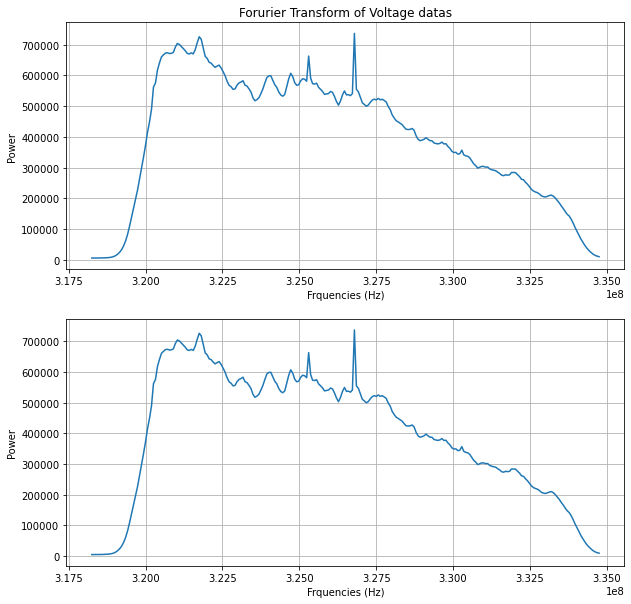

In [ ]:
# Fourier tranform of the given data 
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fft_len = 2**9          # Number of points to be fourier transformed at once
itr = N//fft_len        # Number of iteration required

f0 = 326.5*10**6        # Operating frequency of Ooty telescope
BW = 2*8.25*10**6       # Bandwidth of the Ooty telescope
freqs = np.linspace(f0 - 0.5*BW, f0 + 0.5*BW, fft_len//2)    # Frequency Band

fft_N = np.zeros(fft_len)
fft_S = np.zeros(fft_len)

for i in range(itr):
    fft_N = fft_N + abs(np.fft.fft(Volt_N[i*fft_len : (i+1)*fft_len])**2)
    fft_S = fft_N + abs(np.fft.fft(Volt_S[i*fft_len : (i+1)*fft_len])**2)

fft_N = fft_N/itr
fft_S = fft_S/itr

ax1.plot(freqs, fft_N[fft_len//2:fft_len])
ax1.set_xlabel('Frquencies (Hz)')
ax1.set_ylabel('Power')
ax1.set_title('Forurier Transform of Voltage datas')
ax1.grid()

ax2.plot(freqs, fft_S[fft_len//2:fft_len])
ax2.set_xlabel('Frquencies (Hz)')
ax2.set_ylabel('Power')
ax2.grid()

In [ ]:
df = freqs[-1]-freqs[1]
print("Total bandwidth of the signal (df) : ", df*10**-6, "MHz")

print("Time resolution of voltage sampling (dt) : ", dt*10**9, "ns")

print("Chosen number of frequency bins (N_f) : ", fft_len)

print("Number of voltage samples to obtain FFT, (NFFT) : ",N)

print("Number of spectra obtained through the NFFT−point FFT, (N_s) : ", itr)

print("Time-resolution of the spectral series, (dt_s) : ", fft_len/(2*16.5*10**6)*10**6, "\u03BCs" )

Total bandwidth of the signal (df) :  16.43529411764705 MHz
Time resolution of voltage sampling (dt) :  30.303030303030305 ns
Chosen number of frequency bins (N_f) :  512
Number of voltage samples to obtain FFT, (NFFT) :  32999936
Number of spectra obtained through the NFFT−point FFT, (N_s) :  64453
Time-resolution of the spectral series, (dt_s) :  15.515151515151516 μs


## Task : 5

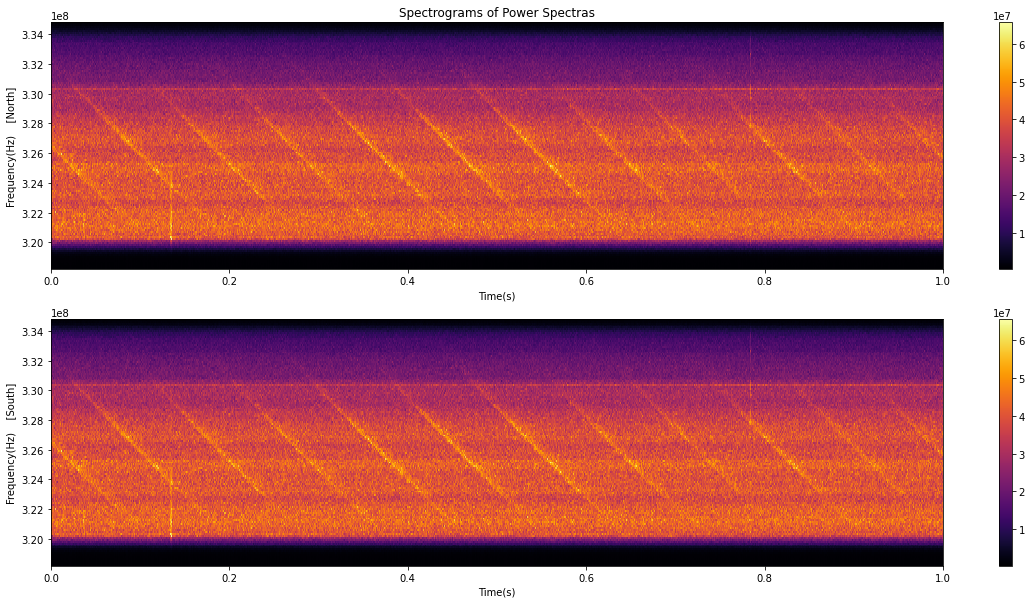

In [ ]:
# Spectorgram of the power data from the north sensor
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fft_len = 2**8          # Number of points to be fourier transformed at once
num_spectra = 2**10     # Number of desired spectra 
m = N/num_spectra       # Number of fourier transformed points in a spectra
itr = int(m//fft_len)   # Number of iterations per spectra

freqs = np.linspace(f0 - 0.5 * 16.5*10**6, f0 + 0.5 * 16.5*10**6, fft_len//2)
time = np.linspace(0, N/(2*16.5*10**6), num_spectra)
spectra_N = []
spectra_S = []

for i in range(num_spectra):
    ppf_N = np.zeros(fft_len)
    ppf_S = np.zeros(fft_len)
    
    for j in range(itr):
        power_N = abs(np.fft.fft(Volt_N[j * fft_len + i * int(m) : (j+1) * fft_len + i * int(m)])**2)
        power_S = abs(np.fft.fft(Volt_S[j * fft_len + i * int(m) : (j+1) * fft_len + i * int(m)])**2)

        ppf_N = ppf_N + power_S
        ppf_S = ppf_S + power_S

    spectra_N.append(ppf_N)
    spectra_S.append(ppf_S)


spectra_N = np.transpose(spectra_N)
spec_N = ax1.pcolormesh(time, freqs, spectra_N[fft_len//2: fft_len][:], cmap = 'inferno')
fig.colorbar(spec_N, ax = ax1)
ax1.set_xlabel("Time(s)")
ax1.set_ylabel("Frequency(Hz)    [North]")
ax1.set_title("Spectrograms of Power Spectras")

spectra_S = np.transpose(spectra_S)
spec_S = plt.pcolormesh(time, freqs, spectra_S[fft_len//2: fft_len][:], cmap = 'inferno')
fig.colorbar(spec_S, ax = ax2)
ax2.set_xlabel("Time(s)")
ax2.set_ylabel("Frequency(Hz)    [South]")

plt.show()

## Task : 6

<IPython.core.display.Javascript object>


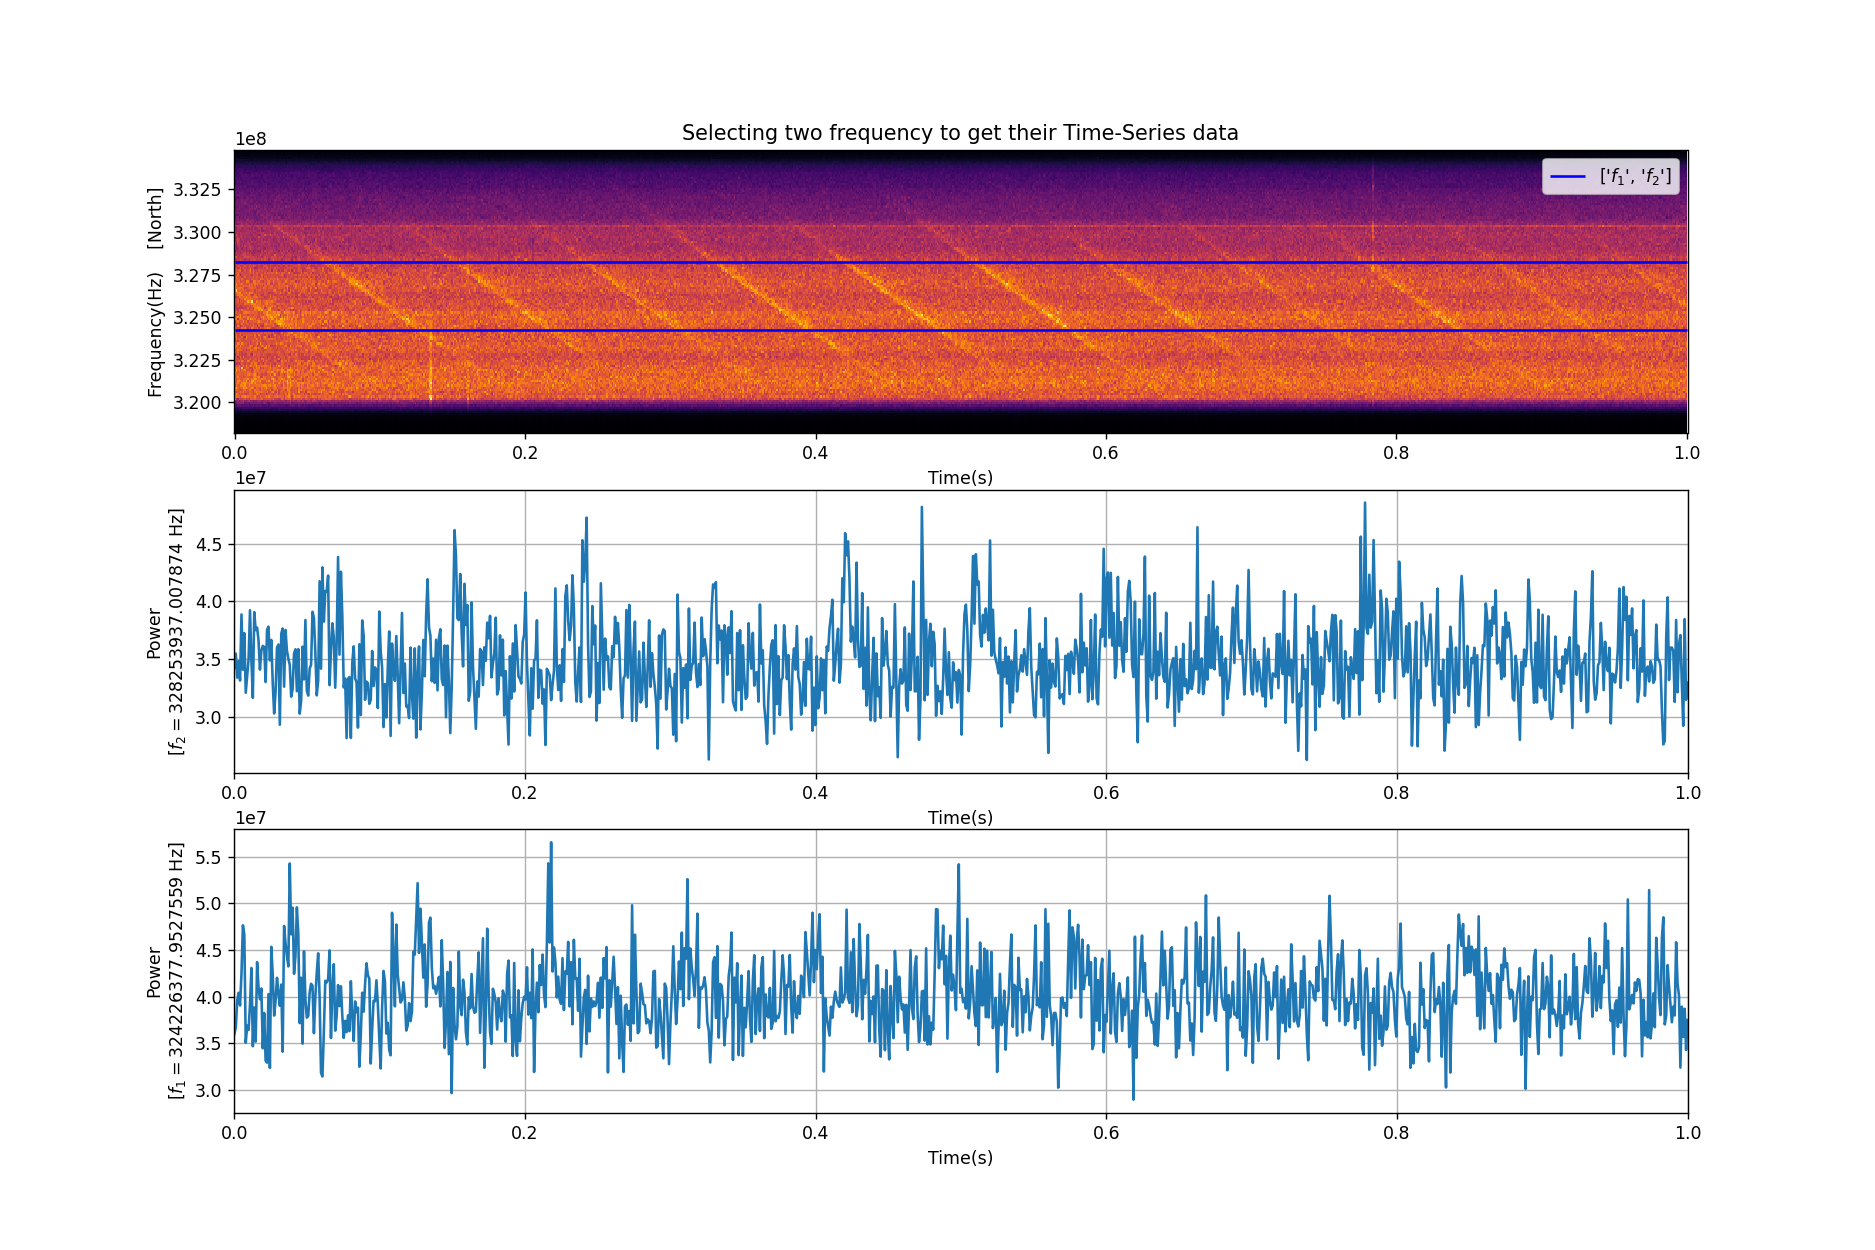

In [ ]:
%matplotlib notebook
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

spectra = spectra_N[fft_len//2: fft_len][:]

f_idx1 = int((fft_len//2)//(1.65/0.6))    # frequency around f0-0.5*15.6*10**6+0.6*10**7 Hz
f_idx2 = int((fft_len//2)//(1.65/1.0))    # frequency around f0-0.5*15.6*10**6+1.0*10**7 Hz

spec_N = ax1.pcolormesh(time, freqs, spectra, cmap = 'inferno')
ax1.hlines([freqs[f_idx1], freqs[f_idx2]], xmin = 0, xmax = 1, color = 'b', 
           label = ['$f_1$', '$f_2$'])
ax1.set_title("Selecting two frequency to get their Time-Series data")
ax1.set_xlabel("Time(s)")
ax1.set_ylabel("Frequency(Hz)    [North]")
ax1.legend()

ax2.plot(time, spectra[f_idx2])
ax2.set_xlim([0,1])
ax2.set_ylabel('Power\n[$f_2=$'+str(freqs[f_idx2])+" Hz]")
ax2.set_xlabel('Time(s)')
ax2.grid()

ax3.plot(time, spectra[f_idx1])
ax3.set_ylabel('Power\n[$f_1=$'+str(freqs[f_idx1])+" Hz]")
ax3.set_xlabel('Time(s)')
ax3.set_xlim([0,1])
ax3.grid()

plt.show()

In [ ]:
# Peak scanner Function:
def Peak_idx(List, initial_idx, final_idx):
    A = List[initial_idx]
    for i in range(initial_idx, final_idx-1):
        if A < List[i]:
            A = List[i]
            idx = i
    return idx

Estimated period of the pulser signal :  89.52410138530958 ms
Relative avg. delay between two frequencies(t_f2 - t_f1) :  66.47103433158566 ms
Dispersion measure of the pulser signal(DM) :  -69055177776930.19


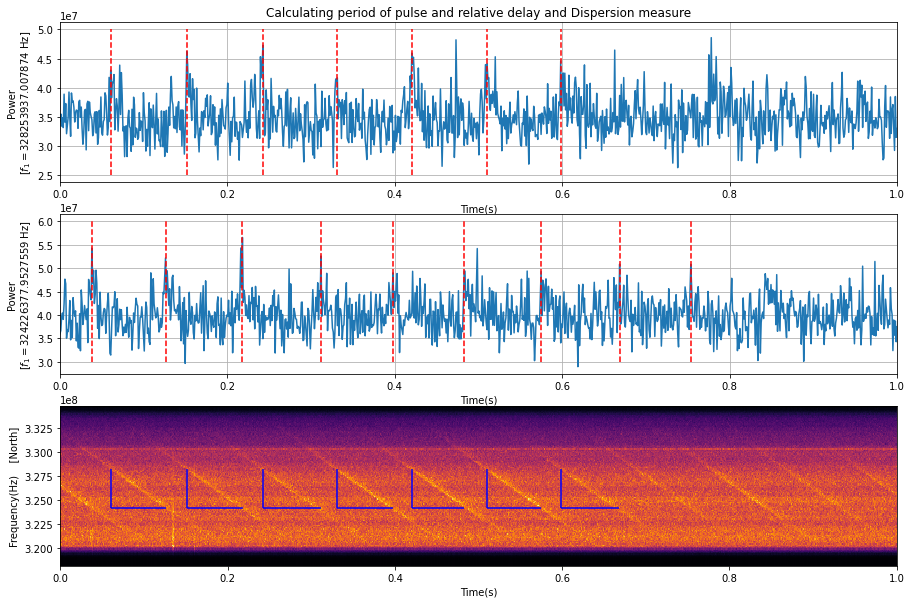

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Selected frequency range for scanning signal
ini_f1 = [0.030, 0.115, 0.200, 0.300, 0.390, 0.470, 0.560, 0.650, 0.740]
fin_f1 = [0.060, 0.130, 0.230, 0.330, 0.410, 0.490, 0.590, 0.680, 0.770]

ini_f2 = [0.050, 0.145, 0.230, 0.325, 0.410, 0.490, 0.590]
fin_f2 = [0.067, 0.170, 0.260, 0.350, 0.440, 0.515, 0.610]

p_time_f1 = []
for i in range(len(ini_f1)):
    ini_idx = int(ini_f1[i]*num_spectra/T)
    fin_idx = int(fin_f1[i]*num_spectra/T)
    p_time_f1.append(time[Peak_idx(spectra[f_idx1], ini_idx, fin_idx)])
    
p_time_f2 = []
for i in range(len(ini_f2)):
    ini_idx = int(ini_f2[i]*num_spectra/T)
    fin_idx = int(fin_f2[i]*num_spectra/T)
    p_time_f2.append(time[Peak_idx(spectra[f_idx2], ini_idx, fin_idx)])

period_f1 = (p_time_f1[-1]-p_time_f1[0])/(len(p_time_f1)-1)
period_f2 = (p_time_f2[-1]-p_time_f2[0])/(len(p_time_f2)-1)
period = (period_f1 + period_f2)/2

print("Estimated period of the pulser signal : ", period*10**3, "ms")

delay = 0
for i in range(len(p_time_f2)):
    delay = delay + (p_time_f1[i+1]-p_time_f2[i])
delay = delay/len(p_time_f2)

print("Relative avg. delay between two frequencies(t_f2 - t_f1) : ", delay*10**3, "ms")

k = 4.149 * 10**3    # column density of electron in cold ionized medium
DM = delay/((1/freqs[f_idx2]**2- 1/freqs[f_idx1]**2)*k)
print("Dispersion measure of the pulser signal(DM) : ", DM)
    
ax1.plot(time, spectra[f_idx2])
ax1.vlines(p_time_f2, ymin = 2.5*10**7, ymax = 5*10**7, colors = 'r', linestyles = 'dashed')
ax1.set_ylabel('Power\n[$f_1=$'+str(freqs[f_idx2])+" Hz]")
ax1.set_xlabel('Time(s)')
ax1.set_xlim([0,1])
ax1.set_title("Calculating period of pulse and relative delay and Dispersion measure")
ax1.grid()

ax2.plot(time, spectra[f_idx1])
ax2.vlines(p_time_f1, ymin = 3*10**7, ymax = 6*10**7, colors = 'r', linestyles = 'dashed')
ax2.set_ylabel('Power\n[$f_1=$'+str(freqs[f_idx1])+" Hz]")
ax2.set_xlabel('Time(s)')
ax2.set_xlim([0,1])
ax2.grid()

spec_N = ax3.pcolormesh(time, freqs, spectra, cmap = 'inferno')
ax3.hlines(freqs[f_idx1]*np.ones(7), xmin = p_time_f2, xmax = p_time_f1[1:8], color = 'b')
ax3.vlines(p_time_f2, ymin = freqs[f_idx1]*np.ones(7) , ymax = freqs[f_idx2]*np.ones(7) , color = 'b')
ax3.set_xlabel("Time(s)")
ax3.set_ylabel("Frequency(Hz)    [North]")

plt.show()

## Task : 7

In [ ]:
# Calculating individual delay of frequencies wrt some reference frequency
ref_idx = int((fft_len//2)//(1.65/0.6))     # Reference frequency index

# Index of boundary frequencies within which the delay is being calculated
u_limit, l_limit = int((fft_len//2)//(1.65/1.20)), int((fft_len//2)//(1.65/0.40))   

t_delay = np.array([k*DM*(1/f_i**2 - 1/freqs[ref_idx]**2) for f_i in freqs[l_limit: u_limit]])

del_t = (N/(2*16.5*10**6))/num_spectra   # Time resolution of spectra

# Time delay of the frequencies in terms of index
td_idx = [int(t_i/del_t) for t_i in t_delay]

<IPython.core.display.Javascript object>


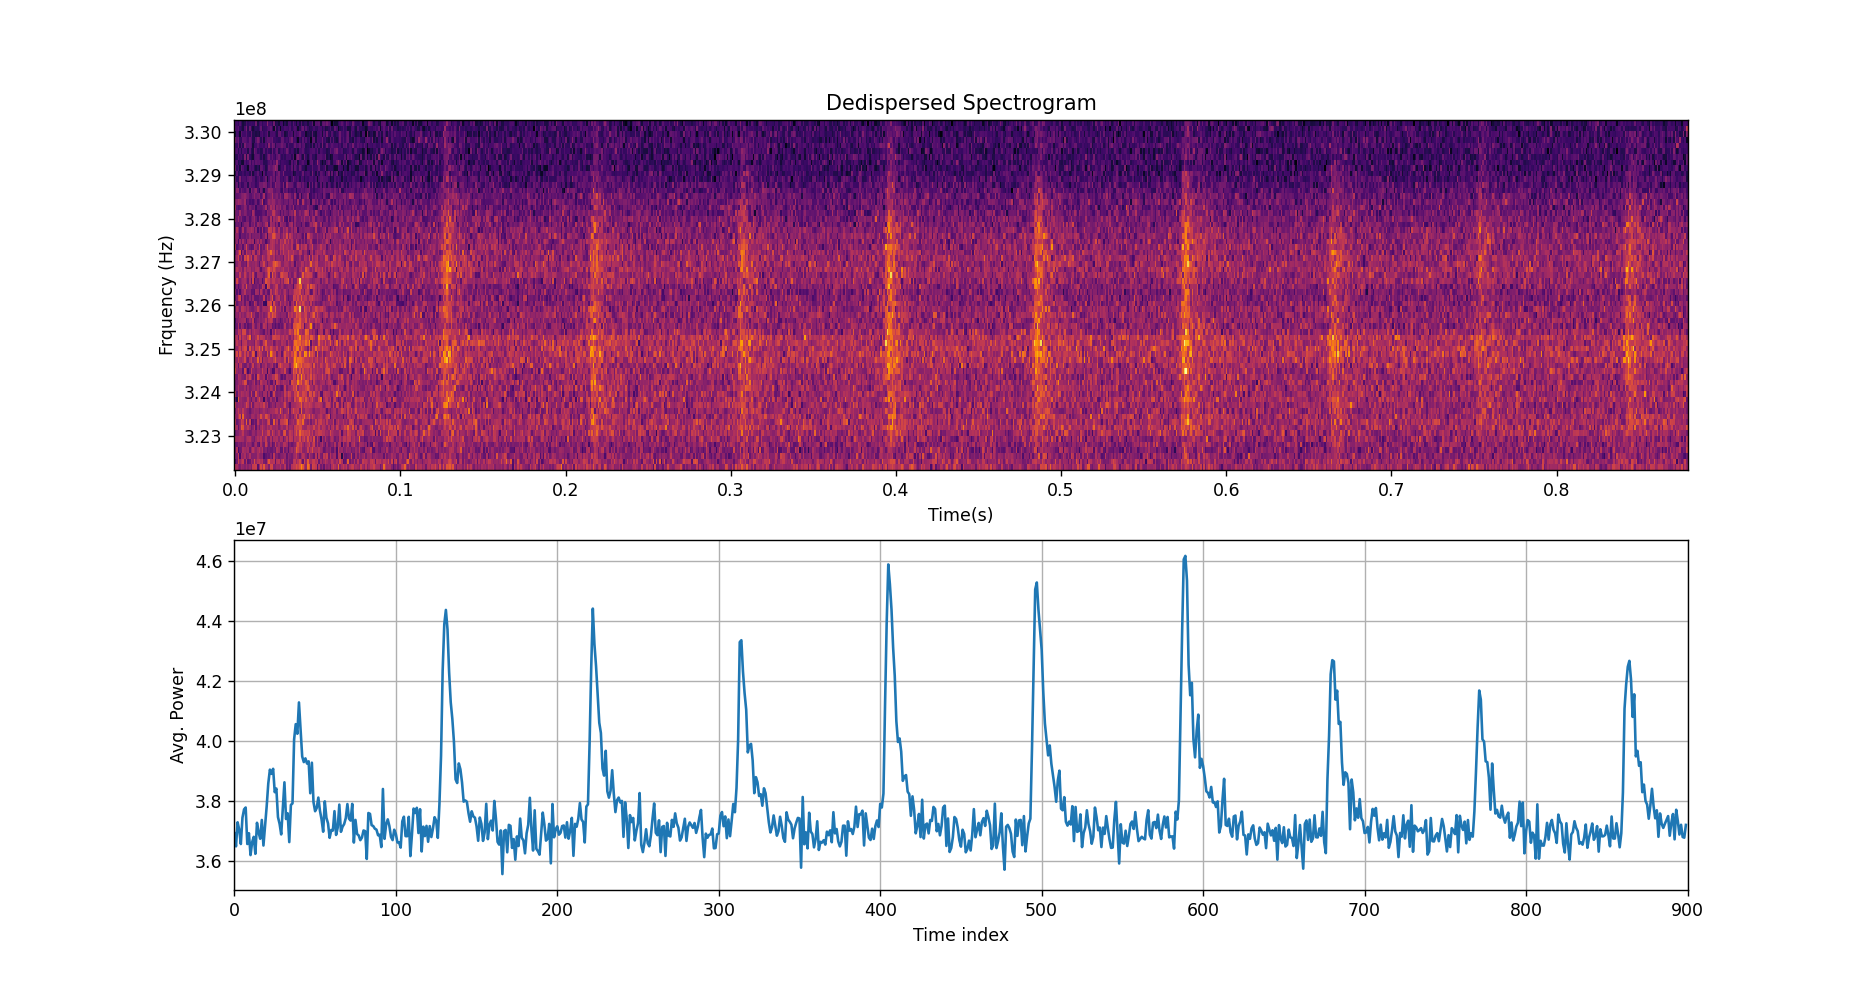

In [ ]:
# Dedispersion of the spectrogram

%matplotlib notebook
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

spec = []
for i in range(l_limit,u_limit):    # Cropping the frequency range 
    st = []
    for j in range(900):            # Cropping the time series 
        p = j - td_idx[i-l_limit]
        st.append(spectra[i][p])
    spec.append(st)

f_dedis = np.array([i for i in freqs[l_limit: u_limit]])
time_dedis = np.array([i for i in time[:900]])
spec_dedis = ax1.pcolormesh(time_dedis, f_dedis, spec, cmap = 'inferno')  # dedispersed spectrogram
ax1.set_title("Dedispersed Spectrogram")
ax1.set_xlabel("Time(s)")
ax1.set_ylabel("Frquency (Hz)")


dedis_ts = np.zeros(len(spec[0]))
spec = np.array(spec)

for i in range(len(spec)):
    dedis_ts = dedis_ts  + spec[i]
    
dedis_ts = dedis_ts/len(spec)
ax2.plot(dedis_ts)
ax2.set_xlim([0,900])
ax2.set_xlabel("Time index")
ax2.set_ylabel("Avg. Power")

ax2.grid()

In [ ]:
# Selected frequency range for scanning signal
tti = [25, 110, 200, 300, 390, 480, 570, 660, 760, 840]
ttf = [60, 160, 240, 340, 430,510, 610, 700, 790, 890]

peak_dedis = []

for i in range(len(tti)):
    peak_dedis.append(Peak_idx(dedis_ts, tti[i], ttf[i]))

p_acc = del_t * (peak_dedis[-1]- peak_dedis[0])/(len(peak_dedis)-1)
print("More accurate period of the pulser signal : ", p_acc*10**3, "ms")

More accurate period of the pulser signal :  89.40954882154882 ms


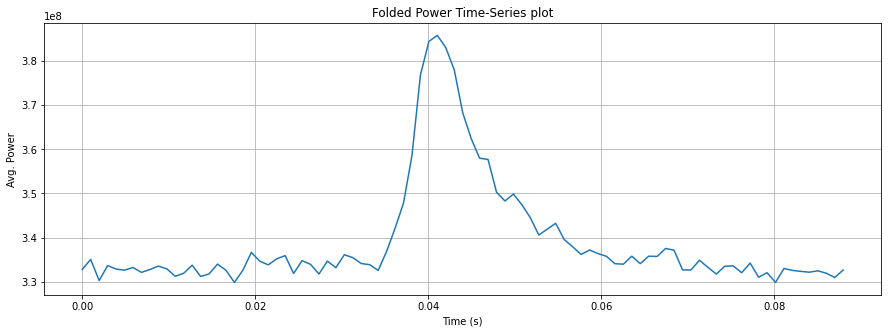

In [ ]:
# Folding the time series of the dedispersed spectrum
%matplotlib inline
fig = plt.figure(figsize=(15,5))

p_idx = int(p_acc/del_t)
fold = np.zeros(p_idx)

for i in range(int(len(dedis_ts)/p_idx)):
    fold = fold + dedis_ts[i*p_idx : (i+1)*p_idx]

plt.plot(time[:p_idx],fold)
plt.title("Folded Power Time-Series plot")
plt.xlabel("Time (s)")
plt.ylabel("Avg. Power")
plt.grid()

Entire code is given in this Git Repository,

https://github.com/Mandal-Anik10/random-stuff.git

____________________